In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gseapy as gp 
from gseapy.plot import barplot, dotplot
import seaborn as sns

In [39]:
data=pd.read_excel("../data/processed/raw-data-columns-name-changed.xlsx",engine='openpyxl')
top_ten=pd.read_excel("../data/processed/top_ten_ratios_compared_to_WT.xlsx",engine='openpyxl')

data.drop(columns="Unnamed: 0",inplace=True)
top_ten.drop(columns="Unnamed: 0",inplace=True)

In [22]:
## Convert significances to p-values . -10*logP=significance 
data_processed=data.copy()
data_processed["p-value"]=10**(-data_processed["Significance"]/10)
data_processed.drop(columns=["-10lgP","Protein Group","Protein ID","PTM"],inplace=True)

data_processed.head()

,Accession,Significance,i_wt_a,i_wt_b,i_dnrp1_a,i_dnrp1_b,i_dbem1gal_a,i_dbem1gal_b,i_dbem1dnrp1gal_a,i_dbem1dnrp1gal_b,...,r_dnrp1_merged,r_dbem1gal_merged,r_dbem1dnrp1gal_merged,r_dbem1galura_merged,Coverage (%),#Peptides,#Unique,Avg. Mass,Description,p-value
0,P19097|FAS2_YEAST,13.75,14490000,14080000,14020000,15350000,17610000,19390000,15860000,16160000,...,1.03,1.29,1.12,1.24,27,46,46,206945,Fatty acid synthase subunit alpha OS=Saccharom...,0.042170
1,P00549|KPYK1_YEAST,14.59,70790000,76000000,64730000,65390000,78940000,83990000,68820000,61770000,...,0.89,1.11,0.89,0.97,50,27,27,54545,Pyruvate kinase 1 OS=Saccharomyces cerevisiae ...,0.034754
2,P02829|HSP82_YEAST,20.10,902100,884300,1288000,912500,914700,931200,1229000,1281000,...,1.24,1.03,1.41,1.41,12,32,6,81406,ATP-dependent molecular chaperone HSP82 OS=Sac...,0.009772
3,P19882|HSP60_YEAST,13.93,11950000,11900000,12900000,13700000,15050000,16540000,15560000,16750000,...,1.12,1.32,1.35,1.39,40,21,21,60752,Heat shock protein 60 mitochondrial OS=Saccha...,0.040458
4,P16861|PFKA1_YEAST,22.64,11000000,10990000,10210000,10150000,11630000,11690000,10680000,10120000,...,0.93,1.06,0.95,1.00,26,27,26,107970,ATP-dependent 6-phosphofructokinase subunit al...,0.005445


In [31]:
# Define a subset of significant data 

significant_subset=data_processed[(data_processed['Significance']>20)]

len(significant_subset)

54

In [32]:
significant_subset.columns
significant_subset.index=significant_subset["Accession"]


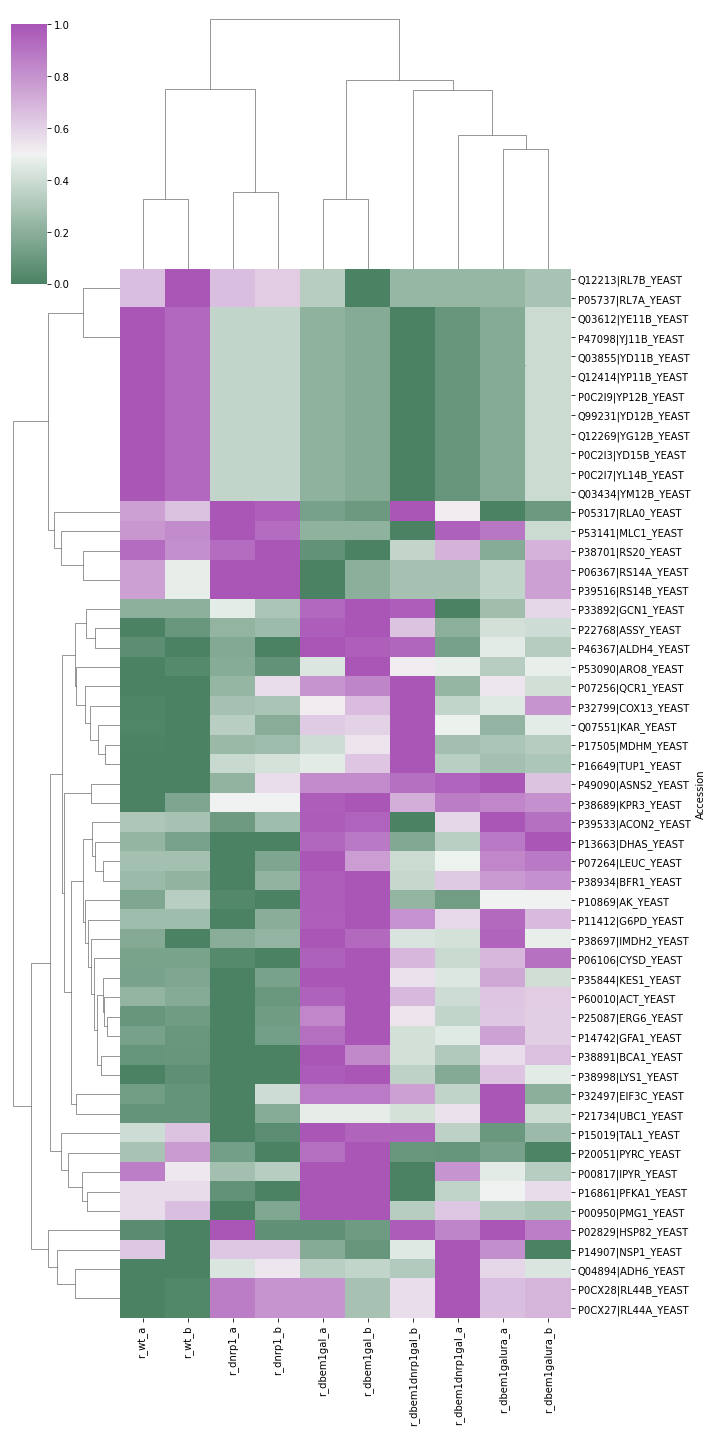

In [34]:


data2cluster=significant_subset.loc[:, significant_subset.columns.str.startswith('r_')] 
data2cluster=data2cluster.iloc[:,0:10]

colors=sns.diverging_palette(145, 300, s=60, as_cmap=True)
g=sns.clustermap(data2cluster,standard_scale=0,cmap=colors,figsize=(10,20))

In [68]:
top_ten.columns

Index(['r_dnrp1_merged', 'r_dbem1gal_merged', 'r_dbem1dnrp1gal_merged',
       'r_dbem1galura_merged'],
      dtype='object')

In [89]:
col=top_ten.columns[3]
top_ten_list=top_ten.loc[:,col][1].strip("][").split(', ')


indexes=["|","_YEAST"]

#gene_list=significant_subset.index.tolist()
gene_list=top_ten_list

gene_list_curated=[]
for genes in gene_list:
   
    string = genes
    index = string.find(indexes[0]) #stores the index of a substring or char
    tmp=string[index:] #returns the chars before the seen char or substring
    index_0=tmp.find(indexes[1])

    gene_list_curated.append(tmp[:index_0].replace("|",""))


In [90]:
#gene_list=data_sl['target_node'].squeeze().str.strip().tolist()

#gene_list=['CDC24','CDC42', 'NRP1', 'BEM1', 'BEM3', 'BEM2', 'RDI1','CLA4']


yeast = gp.get_library_name(database='Yeast')
sets=[yeast[2],yeast[5],yeast[8] ] #['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018']
#%% enrichment 
for i in [0,1,2]: 

  enr = gp.enrichr(gene_list=gene_list_curated,
                  gene_sets=sets[i],
                  organism='Yeast', # don't forget to set organism to the one you desired! e.g. Yeast
                  description='test_name',
                  outdir='../data/processed/enrich-analysis/'+col,
                  # no_plot=True,
                  cutoff=0.5 # test dataset, use lower value from range(0,1)
                )